# A CDC Halloween 🎃 Designing Personal Predictions
<p>Harshika Jain<br>
Human AI Interaction HW3 Part 1<br>
Professors: Chinmay Kulkarni, Mary Beth Kery</p>

<h2>Brief</h2>
<p>The Center for Disease Control and Prevention (CDC) is a federal public health and safety agency of the United States. This is an exploration of their public death dataset which records cause-of-death of everyone deceased in the United States. The CDC’s goal is to raise public awareness of health, so the dataset will only include deaths by natural causes or accidents, to help current residents of the country take better precautions about their own health.</p>
<hr>
<h2>Designing Personal Predictions</h2>
<p>The goal of Part 2 is to start designing an interactive interface, where a user that comes to the CDC visualization can put in their own information, and see the most common causes of death for their attributes (like age, gender, and so on)</p>

<h2>A. Design for Personas</h2>
<p>Design for personas. For each of the fictional users given, create a single visualization that shows the most likely cause of death for that user. To experiment with design choices, make each user/visualization pair a different visualization that represents different design choices (e.g. you could try a different plot type for some users). [20 Points]</p>
<ul>
    <li>Miles is a young black male college student. He is 20 years old and lives a healthy lifestyle. He doesn’t smoke or use drugs, but does drink alcohol in social settings. </li>
    <li>Jonas is a 72 year old man, immigrated from Germany to the United States in his thirties, and has a highschool level education. His wife passed away last year.</li>
    <li>Alma is a 36 year old woman with two kids. She is hispanic and co-parents her kids with a long term romantic partner but does not believe in marriage. She has an accounting degree and a strong family history of breast cancer.</li>
</ul>

In [20]:
# import widgets for jupyternotebook
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# import other packages for data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("data/death_causes.csv") # create dataframe
corr = data.corr(method = 'pearson')
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,age,education,month_of_death,day_of_week_of_death
Unnamed: 0,1,0.0207863,0.0167441,0.0347676,0.00398752
age,0.0207863,1,0.0180792,-0.0176715,0.000795143
education,0.0167441,0.0180792,1,0.0479605,0.000491207
month_of_death,0.0347676,-0.0176715,0.0479605,1,-0.0124744
day_of_week_of_death,0.00398752,0.000795143,0.000491207,-0.0124744,1


In [4]:
data.race.unique()

array(['White', 'Black', 'Korean', 'Vietnamese', 'Indian',
       'Native American', 'Hawaiian', 'Chinese', 'Japanese',
       'other Asian or Pacific Islander', 'Filipino', 'Samoan',
       'Guamanian'], dtype=object)

<h2>A1: Miles</h2>
<h3>Visualization 1: </h3>
<p>College students are typically aged between 18 and 24 years <a href = https://blog.campus.app/student-demographics-in-higher-education>(source reference) </a>, thus records between 18 and 24 years were chosen from the whole dataset. The different general categories for the cause of death were counted for the age group. This is so that Miles can know the top causes of death for college students and take necessary precautions.</p>

In [5]:
miles = data.loc[(data['age'] > 18) & (data['age'] < 24)].reset_index()
miles.tail()

,index,Unnamed: 0,age,sex,race,education,month_of_death,day_of_week_of_death,manner,relationship_status,icd_code,cause,group
438,99073,2313676,22,M,Black,2.0,4,4,Accident,Single,V89,"['Motor- or nonmotor-vehicle accident, type of...",Motor Vehicle Accident
439,99186,739469,22,M,Black,3.0,10,7,Natural Causes,Single,I50,['Heart failure'],Heart Disease
440,99266,1239830,23,M,White,3.0,8,3,Accident,Single,V89,"['Motor- or nonmotor-vehicle accident, type of...",Motor Vehicle Accident
441,99322,869751,21,F,White,4.0,7,3,Accident,Single,V49,['Car occupant injured in other and unspecifie...,Motor Vehicle Accident
442,99693,2579771,20,M,White,3.0,6,2,Accident,Single,V27,['Motorcycle rider injured in collision with f...,Motor Vehicle Accident


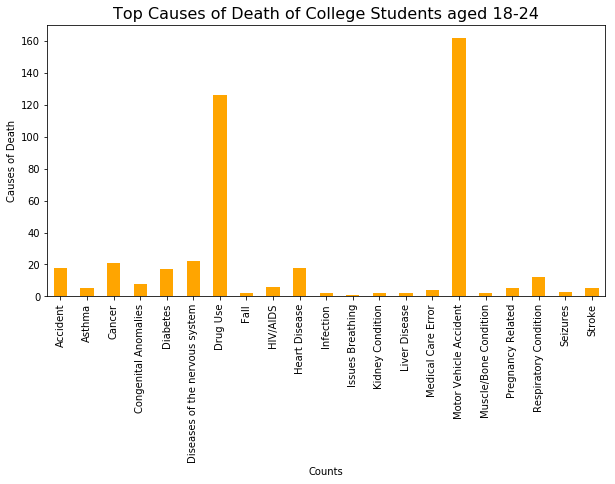

In [6]:
miles_group = miles.groupby(['group']).count()['age']
miles_group.plot(kind = 'bar', figsize = [10,5], color='orange')
plt.title('Top Causes of Death of College Students aged 18-24', fontsize = 16)
plt.xlabel('Counts')
plt.ylabel('Causes of Death')
plt.show()

In [ ]:
miles_group = miles.groupby(['group']).count()['age']
miles_group.plot(kind = 'bar', figsize = [10,5], color='orange')
plt.title('Top Causes of Death of College Students aged 18-24', fontsize = 16)
plt.xlabel('Counts')
plt.ylabel('Causes of Death')
plt.show()

<h3>Inference from Visualisation 1: <br>
The top causes of death of college students is Motor Vehicle Accidents and Drug Use followed by Cancer, Diabetes, and Heart Diseases.</h3>

<h3>Visualization 2:</h3>
<p>The intent of this graph is to highlight the count of Alcohol related disorders from the cause column in the 'Drug Use' group. However, many empty cells exist in the column (119) and the count of Alcohol related disorders is just 1, which is not representative of the sample size.</p>

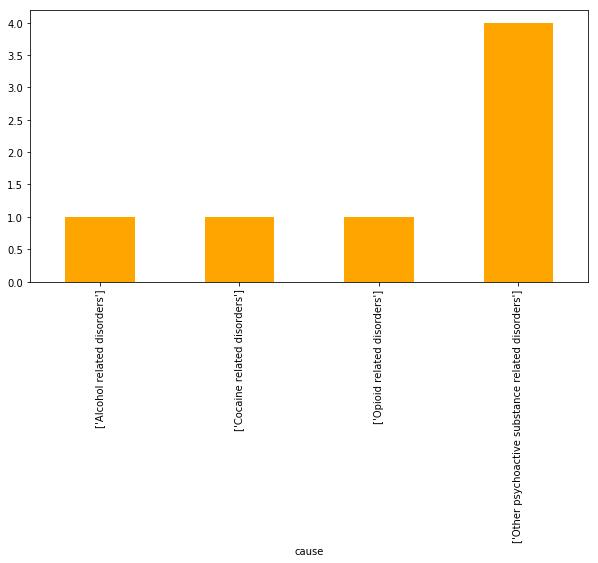

In [7]:
miles_drug = miles.loc[miles['group'] == 'Drug Use'].reset_index()
miles_drug = miles_drug[miles_drug.cause != '[]'] #Drop the empty [] which are 119 in number
miles_drug_group = miles_drug.groupby(['cause']).count()['age']
miles_drug_group.plot(kind = 'bar', color='orange', figsize = [10,5])

In [8]:
miles_drug['cause'].value_counts() 

['Other psychoactive substance related disorders']    4
['Alcohol related disorders']                         1
['Cocaine related disorders']                         1
['Opioid related disorders']                          1
Name: cause, dtype: int64

<h3>Inference: Visualization 1 is a better graph for Miles<br>
The second graph does not represent the Alcohol drinking sample size completely, thus it is better to not show a prediction like this to Miles, our target user.</h3>
<hr>

<h2>A2: Jonas</h2>

In [9]:
jonas = data.loc[(data['age'] > 65) & (data['age'] < 75) & (data['relationship_status'] == 'Widowed')].reset_index()
jonas.head()

,index,Unnamed: 0,age,sex,race,education,month_of_death,day_of_week_of_death,manner,relationship_status,icd_code,cause,group
0,33,1633543,70,F,White,2.0,10,1,Natural Causes,Widowed,I25,['Chronic ischemic heart disease'],Heart Disease
1,139,420027,66,M,White,3.0,7,2,Natural Causes,Widowed,I25,['Chronic ischemic heart disease'],Heart Disease
2,154,1498711,70,F,Black,3.0,7,6,Natural Causes,Widowed,J98,['Other respiratory disorders'],Respiratory Condition
3,190,683217,73,F,White,3.0,1,5,Natural Causes,Widowed,J44,['Other chronic obstructive pulmonary disease'],Asthma
4,194,1522105,74,F,White,3.0,10,2,Natural Causes,Widowed,C82,['Follicular lymphoma'],Cancer


<h3>Visualization 1:</h3>
<p>Since Jonas is 72, the age range chosen to show him personalised predictions is 65-75 years. According to Medicare, a senior is 65 years or older. Furthermore, the data has been selected on the bases of the 'relationship status of Jonas' i.e. Widowed. The graph type is a countplot, which divides the Top Causes of Death by Gender. In the appendix, there are test visualizations in which the data has further been selected on the level of education, but the graphs do not seem to have much of a difference.</p>

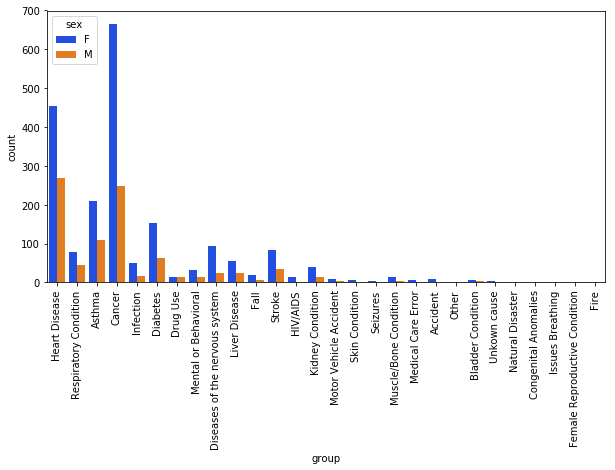

In [10]:
jonas_group = jonas.groupby(['group']).count()['age'].reset_index(name = 'counts')
plt.figure(figsize=(10,5))
sns.countplot(x='group', hue='sex', data=jonas, palette="bright")
plt.xticks(rotation=90)
# plt.ylim(65,75)
plt.show()

<h3>Inference for Visualization 1:</h3>
<p>This graph shows that for widowed men in the age range of 65 -75, the leading cause of death is heart disease followed by caancer, followed by Asthma. This is different for females, cancer being the leading cause of death. Thus a countplot which segregates the causes of death by gender, is better than bucketing them in the same group.</p>

### Visualization 2

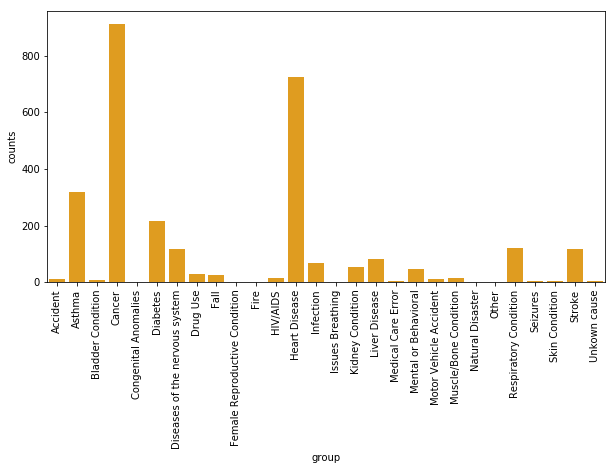

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x='group', y='counts', data=jonas_group, color = 'orange')
plt.xticks(rotation=90)
plt.show()

Note to self: make graph without relationship status to see if there is a difference. 
***

## A3: Alma

In [12]:
alma = data.loc[(data['group'] == 'Cancer') & (data['sex'] == 'F') & (data['age'] > 30) & (data['age'] < 40)].reset_index()
alma.head()

,index,Unnamed: 0,age,sex,race,education,month_of_death,day_of_week_of_death,manner,relationship_status,icd_code,cause,group
0,98,1395973,39,F,White,3.0,10,2,Natural Causes,Married,C16,['Malignant neoplasm of stomach'],Cancer
1,130,2377936,36,F,White,3.0,8,6,Natural Causes,Married,C50,['Malignant neoplasm of breast'],Cancer
2,357,2574005,35,F,White,7.0,3,1,Natural Causes,Married,C18,['Malignant neoplasm of colon'],Cancer
3,1174,625212,33,F,White,3.0,9,6,Natural Causes,Divorced,C54,['Malignant neoplasm of corpus uteri'],Cancer
4,1836,1897307,38,F,White,6.0,12,3,Natural Causes,Married,C50,['Malignant neoplasm of breast'],Cancer


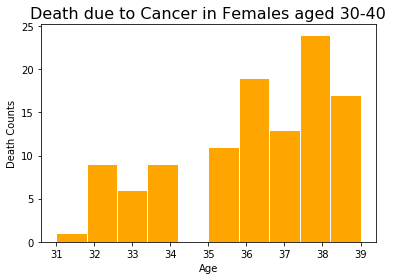

In [13]:
plt.hist(alma['age'], color = 'orange', edgecolor = 'white')
plt.title('Death due to Cancer in Females aged 30-40', fontsize = 16)
plt.xlabel('Age')
plt.ylabel('Death Counts')
plt.show()

***

## B. 
Which visualization from A do you think is the most successful design? What visualization techniques did you use? [3 points]

## C.
Given your visualizations in A, what would be good questions for a user to ask a personalized visualization from this dataset? What would be some bad questions that a personalized visualization (with this dataset alone) cannot answer? [7 points]

## D.
If users like those in A visit the interactive tool on the CDC website, what information (e.g. age or race) would you have them put in to show the most relevant death visualization and why? [10 points]

## E.
For each column in the dataset, describe how you would bin the data for a good user experience and why. For instance, ‘age’ can be not binned (exact numbers) or binned into ‘child’, ‘young adult’, ‘adult’, ‘elder’... or many other bin choices. [10 points]

## Appendix

### Two ways of selecting rows based on column value

In [14]:
value_list = ['20']
miles = data.loc[data['age'].isin(value_list)]

In [15]:
#OR
data = pd.read_csv("data/death_causes.csv") # create dataframe
miles = data.loc[data['age'] == 20]
miles.head()

,Unnamed: 0,age,sex,race,education,month_of_death,day_of_week_of_death,manner,relationship_status,icd_code,cause,group
9,363001,20,M,White,2.0,11,5,Accident,Single,V89,"['Motor- or nonmotor-vehicle accident, type of...",Motor Vehicle Accident
1712,2707122,20,M,White,1.0,10,3,Natural Causes,Single,Q87,['Other specified congenital malformation synd...,Congenital Anomalies
2573,739133,20,M,Black,3.0,5,4,Natural Causes,Single,J45,['Asthma'],Asthma
2941,1881926,20,M,White,2.0,10,5,Accident,Single,X42,[],Drug Use
4658,1958567,20,M,White,3.0,5,1,Accident,Single,X44,[],Drug Use


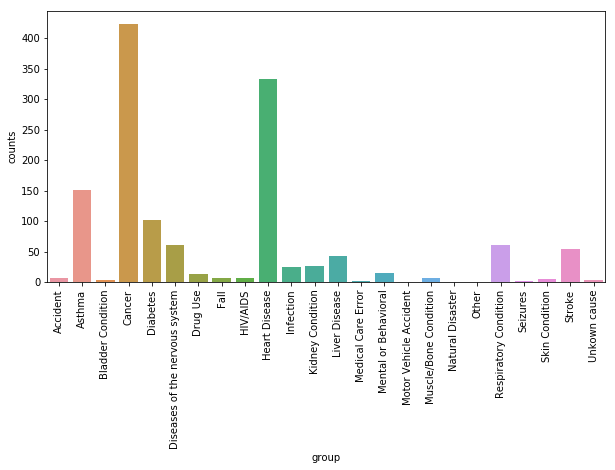

In [16]:
jonas = data.loc[(data['age'] > 65) & (data['age'] < 75) & (data['relationship_status'] == 'Widowed') & (data['education'] ==3)].reset_index()
jonas_group = jonas.groupby(['group']).count()['age'].reset_index(name = 'counts')
plt.figure(figsize=(10,5))
sns.barplot(x='group', y='counts', data=jonas_group)
plt.xticks(rotation=90)
plt.show()

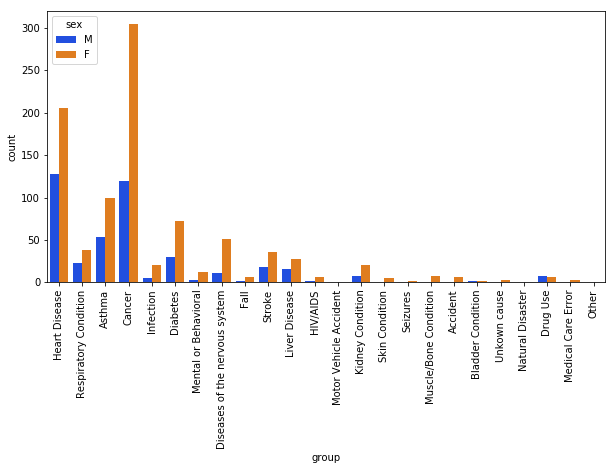

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='group', hue='sex', data=jonas, palette="bright")
plt.xticks(rotation=90)
# plt.ylim(65,75)
plt.show()